In [21]:
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, make_scorer
from sklearn.utils import shuffle

from tools import plot_confusion_matrix

In [22]:
df = pd.read_csv('../../data/processed/sampled_reverts.csv')
df.head(5)

,Unnamed: 0,user_id,article_id,revision_id,reverted,time,date,time_first_contribution,num_articles_after_revert,num_articles_before_revert,days_before_revert,target
0,0,625301,5878072,270172180,1,2009-02-12 06:28:05,2009-02-12,2006-02-02 20:47:42,4510,30532,1105,1
1,1,275773,1704479,222606110,1,2008-06-30 06:14:47,2008-06-30,2004-07-22 09:18:16,125,3661,1438,1
2,2,289618,969076,326150910,1,2009-11-16 12:24:02,2009-11-16,2007-01-16 22:20:20,1108,4836,1034,1
3,3,945106,20436701,364301805,1,2010-05-26 14:12:43,2010-05-26,2004-03-01 20:22:53,7291,71968,2276,1
4,4,283573,1369965,306256012,1,2009-08-05 18:47:30,2009-08-05,2005-09-02 01:53:47,4138,5705,1433,1


In [23]:
df.shape

(500000, 12)

In [24]:
df = df.dropna()
df.shape

(500000, 12)

In [25]:
df.target.value_counts()

1    498439
0      1561
Name: target, dtype: int64

In [26]:
y = df.target
X = df[['num_articles_before_revert', 'days_before_revert']]

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
model = LogisticRegression()

parameters = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.05, 0.1, 0.5],
    'class_weight': ['balanced', None]
}


scorer = make_scorer(score_func=accuracy_score)

grid_obj = GridSearchCV(model, parameters, scoring=scorer)

grid_fit = grid_obj.fit(X_train, y_train)

best_clf = grid_fit.best_estimator_

/Users/leportella/miniconda3/envs/wiki/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/leportella/miniconda3/envs/wiki/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/leportella/miniconda3/envs/wiki/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/leportella/miniconda3/envs/wiki/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/le

/Users/leportella/miniconda3/envs/wiki/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/leportella/miniconda3/envs/wiki/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/leportella/miniconda3/envs/wiki/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/leportella/miniconda3/envs/wiki/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/leportella/miniconda3/envs/wiki/lib/python3.7/site-packages/sklearn/linea

In [29]:
y_pred = best_clf.predict(X_test)

In [30]:
accuracy_score(y_test, y_pred)

0.99669

In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       331
           1       1.00      1.00      1.00     99669

   micro avg       1.00      1.00      1.00    100000
   macro avg       0.50      0.50      0.50    100000
weighted avg       0.99      1.00      1.00    100000



/Users/leportella/miniconda3/envs/wiki/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Confusion matrix, without normalization
[[    0   331]
 [    0 99669]]


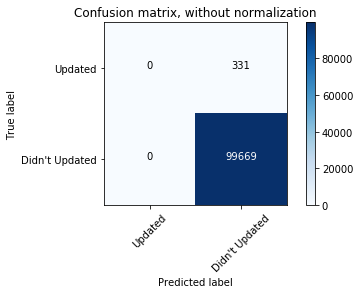

In [32]:
cnf_matrix = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cnf_matrix, classes=['Updated', "Didn't Updated"],
                      title='Confusion matrix, without normalization')